<a href="https://colab.research.google.com/github/tejatanush/Reciept-OCR/blob/main/Receipt_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Description:**
Character Extraction Model makes it easy for users to extract text, such as prices, dates, and item names, from printed or digital receipts. This model uses Optical Character Recognition (OCR) powered by computer vision to automatically read and convert printed text on receipts into editable and searchable digital formats. It eliminates the need for manual data entry, making it a great tool for expense tracking, financial management, and business reporting.

# 1. Install dependecies and import libraries

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,931 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)


# 2. Import Image

Select a good image with good quality for extracting characters from image or reciepts.

In [ ]:
from PIL import Image
image_path = '/content/receipt-ocr-original.jpg'
img = cv2.imread(image_path)

**imshow** function to plot images

In [ ]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# 3. Build a model

Let's build a model to extract the text. So that convert our image to HSV from color image because it is good in brightness, saturation so that model cn underdtand text in image easily. Apply threshoold to the HSV image so that only black and white colours are in converted image the model can able to understand text without any confusion.

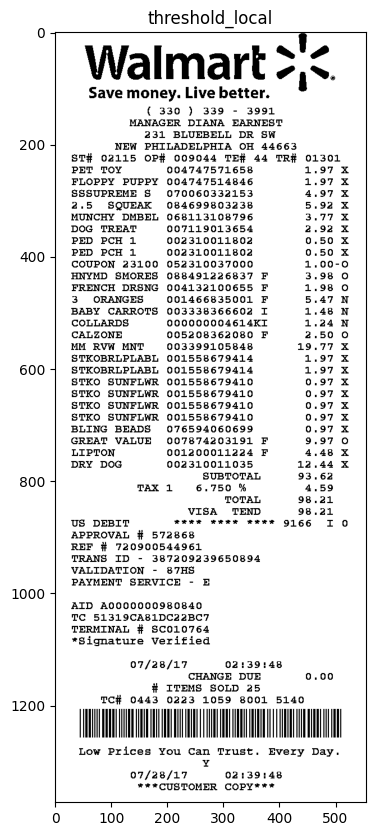

PyTesseract Extracted: Walmart - ><.

Save money. Live better.

(330 ) 339 - 3991
MANAGER DIANA EARNEST
231 BLUEBELL DR SW
NEW PHILADELPHIA OH 44663
ST# 02115 OP# 009044 TE# 44 TR# 01301

PET TOY 004747571658 1.97 x
FLOPPY PUPPY 004747514846 1.97 x
SSSUPREME S 070060332153 4.97 X
2.5 SQUEAK 084699803238 5.92 x
MUNCHY DMBEL 068113108796 3.77 X
DOG TREAT 007119013654 2.92 x
PED PCH 1 002310011802 0.50 X
PED PCH 1 002310011802 0.50 X
COUPON 23100 052310037000 1.00-0
HNYMD SMORES 088491226837 F 3.98 0
FRENCH DRSNG 004132100655 F 1.98 0
3 ORANGES 001466835001 F 5.47 N
BABY CARROTS 003338366602 I 1.48 N
COLLARDS 000000004614KT 1.24 N
CALZONE 005208362080 F 2.50 0
MM RVW MNT 003399105848 19.77 X
STKOBRLPLABL 001558679414 1.97 x
STKOBRLPLABL 001558679414 1.97 x
STKO SUNFLWR 001558679410 0.97 x
STKO SUNFLWR 001558679410 0.97 x
STKO SUNFLWR 001558679410 0.97 x
STKO SUNFLWR 001558679410 0.97 x
BLING BEADS 076594060699 0.97 x
GREAT VALUE 007874203191 F 9.97 0
LIPTON 001200011224 F 4.48 xX
DRY DOG 

In [ ]:
from skimage.filters import threshold_local

V=cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))[2]
T=threshold_local(V,25,offset=15,method="gaussian")
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

We can able to see all the extracted text from the recipet which can be further used to load data in to files or for multiple tasks.